**We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data.**

Here are some of the columns in the dataset:

* `Rank` - Rank by median earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.

Our aim is to identify;

* Dominant Major_category for Men and Women
* Top Majors in Dominant category according to the highest Employment
* Top Majors in Dominant category according to highest Median Salary

## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
jobs = pd.read_csv("jobs.csv")

In [3]:
jobs.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


## **Checking null values**

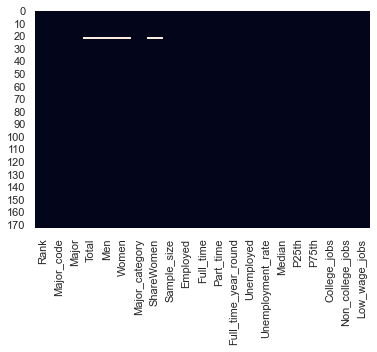

In [4]:
sns.heatmap(jobs.isnull(),cbar =  False)
plt.show()

In [5]:
jobs[jobs["Men"].isnull()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


**we can see that we have getting the null values in same row in all columns**

## **droping the null values**

In [6]:
jobs.dropna(axis = "index",inplace = True)

In [7]:
jobs.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [8]:
len(jobs["Major_category"].unique())

16

In [10]:
dominant = jobs.groupby("Major_category")[["Men","Women"]].mean()

In [11]:
dominant

,Men,Women
Major_category,,
Agriculture & Natural Resources,4484.111111,3918.111111
Arts,16798.750000,27842.500000
Biology & Life Science,13208.500000,19210.214286
Business,51373.230769,48809.538462
Communications & Journalism,32980.250000,65170.000000
Computers & Mathematics,18975.000000,8207.545455
Education,6470.375000,28475.187500
Engineering,14079.551724,4457.793103
Health,6293.083333,32309.416667


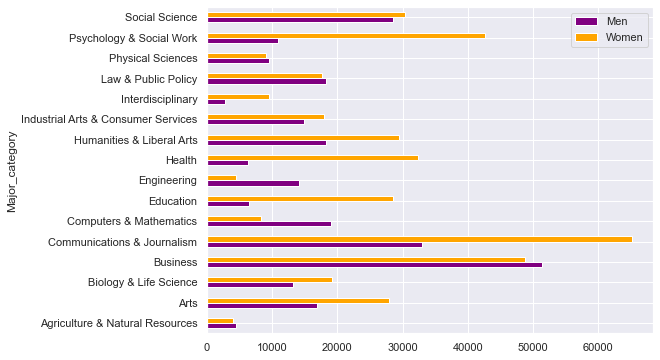

In [64]:
c = ['purple','orange']
dominant.plot.barh(color = c,figsize = (8,6))
plt.show()

In [13]:
def dom(row):
    men = row["Men"]
    women = row["Women"]
    if men > women:
        return "Men"
    else:
        return "Women"

In [14]:
dominant.apply(dom,axis = 1)

Major_category
Agriculture & Natural Resources          Men
Arts                                   Women
Biology & Life Science                 Women
Business                                 Men
Communications & Journalism            Women
Computers & Mathematics                  Men
Education                              Women
Engineering                              Men
Health                                 Women
Humanities & Liberal Arts              Women
Industrial Arts & Consumer Services    Women
Interdisciplinary                      Women
Law & Public Policy                      Men
Physical Sciences                        Men
Psychology & Social Work               Women
Social Science                         Women
dtype: object

In [15]:
dominant["Dominant_Category"] = dominant.apply(dom,axis = 1)

In [16]:
dominant

,Men,Women,Dominant_Category
Major_category,,,
Agriculture & Natural Resources,4484.111111,3918.111111,Men
Arts,16798.750000,27842.500000,Women
Biology & Life Science,13208.500000,19210.214286,Women
Business,51373.230769,48809.538462,Men
Communications & Journalism,32980.250000,65170.000000,Women
Computers & Mathematics,18975.000000,8207.545455,Men
Education,6470.375000,28475.187500,Women
Engineering,14079.551724,4457.793103,Men
Health,6293.083333,32309.416667,Women


In [17]:
gen_grp = dominant.groupby("Dominant_Category")
gen_grp

In [18]:
gen_grp.groups

{'Men': ['Agriculture & Natural Resources', 'Business', 'Computers & Mathematics', 'Engineering', 'Law & Public Policy', 'Physical Sciences'], 'Women': ['Arts', 'Biology & Life Science', 'Communications & Journalism', 'Education', 'Health', 'Humanities & Liberal Arts', 'Industrial Arts & Consumer Services', 'Interdisciplinary', 'Psychology & Social Work', 'Social Science']}

In [20]:
gen_grp.groups["Men"]

Index(['Agriculture & Natural Resources', 'Business',
       'Computers & Mathematics', 'Engineering', 'Law & Public Policy',
       'Physical Sciences'],
      dtype='object', name='Major_category')

In [21]:
gen_grp.groups["Women"]

Index(['Arts', 'Biology & Life Science', 'Communications & Journalism',
       'Education', 'Health', 'Humanities & Liberal Arts',
       'Industrial Arts & Consumer Services', 'Interdisciplinary',
       'Psychology & Social Work', 'Social Science'],
      dtype='object', name='Major_category')

In [22]:
men_grp = gen_grp.get_group("Men") 
men_grp

,Men,Women,Dominant_Category
Major_category,,,
Agriculture & Natural Resources,4484.111111,3918.111111,Men
Business,51373.230769,48809.538462,Men
Computers & Mathematics,18975.000000,8207.545455,Men
Engineering,14079.551724,4457.793103,Men
Law & Public Policy,18225.800000,17595.600000,Men
Physical Sciences,9539.000000,9008.900000,Men


In [23]:
women_grp = gen_grp.get_group("Women")
women_grp

,Men,Women,Dominant_Category
Major_category,,,
Arts,16798.750000,27842.500000,Women
Biology & Life Science,13208.500000,19210.214286,Women
Communications & Journalism,32980.250000,65170.000000,Women
Education,6470.375000,28475.187500,Women
Health,6293.083333,32309.416667,Women
Humanities & Liberal Arts,18189.733333,29374.800000,Women
Industrial Arts & Consumer Services,14825.857143,18001.571429,Women
Interdisciplinary,2817.000000,9479.000000,Women
Psychology & Social Work,10901.666667,42543.555556,Women


In [24]:
men_cat = men_grp.index
men_cat = list(men_cat)
men_cat

['Agriculture & Natural Resources',
 'Business',
 'Computers & Mathematics',
 'Engineering',
 'Law & Public Policy',
 'Physical Sciences']

In [25]:
women_cat = women_grp.index
women_cat = list(women_cat)
women_cat

['Arts',
 'Biology & Life Science',
 'Communications & Journalism',
 'Education',
 'Health',
 'Humanities & Liberal Arts',
 'Industrial Arts & Consumer Services',
 'Interdisciplinary',
 'Psychology & Social Work',
 'Social Science']

In [26]:
jobs.shape

(172, 21)

In [27]:
men_bol = jobs["Major_category"].isin(men_cat)
men_bol

0       True
1       True
2       True
3       True
4       True
       ...  
168    False
169    False
170    False
171    False
172    False
Name: Major_category, Length: 172, dtype: bool

In [28]:
women_bol = jobs["Major_category"].isin(women_cat)
women_bol

0      False
1      False
2      False
3      False
4      False
       ...  
168     True
169     True
170     True
171     True
172     True
Name: Major_category, Length: 172, dtype: bool

In [29]:
men_majors = jobs[men_bol]
women_majors = jobs[women_bol]

In [30]:
men_majors.shape,women_majors.shape

((77, 21), (95, 21))

In [31]:
men_majors.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [33]:
women_majors.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
26,27,5601,CONSTRUCTION SERVICES,18498.0,16820.0,1678.0,Industrial Arts & Consumer Services,0.090713,295,16318,...,1751,12313,1042,0.060023,50000,36000,60000,3275,5351,703
32,33,6099,MISCELLANEOUS FINE ARTS,3340.0,1970.0,1370.0,Arts,0.410180,30,2914,...,1067,1200,286,0.089375,50000,25000,66000,693,1714,755
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.896019,2554,180903,...,40818,122817,8497,0.044863,48000,39000,58000,151643,26146,6193
36,37,5501,ECONOMICS,139247.0,89749.0,49498.0,Social Science,0.355469,1322,104117,...,25325,70740,11452,0.099092,47000,35000,65000,25582,37057,10653
44,45,6105,MEDICAL TECHNOLOGIES TECHNICIANS,15914.0,3916.0,11998.0,Health,0.753927,190,13150,...,2665,9005,505,0.036983,45000,36000,50000,5546,7176,1002


In [34]:
m = men_majors["Major_category"].unique()

In [36]:
pd.Series(sorted(m)).equals(pd.Series(men_cat))

True

## **Men Employed Majors**

In [37]:
employ_men_majors = men_majors.sort_values(["Employed"],ascending = False)

In [38]:
employ_men_majors

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,...,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395
57,58,6200,GENERAL BUSINESS,234590.0,132238.0,102352.0,Business,0.436302,2380,190183,...,36241,138299,14946,0.072861,40000,30000,55000,29334,100831,27320
77,78,6206,MARKETING AND MARKETING RESEARCH,205211.0,78857.0,126354.0,Business,0.615727,2684,178862,...,35829,127230,11663,0.061215,38000,30000,50000,25320,93889,27968
40,41,6201,ACCOUNTING,198633.0,94519.0,104114.0,Business,0.524153,2042,165527,...,27693,123169,12411,0.069749,45000,34000,56000,11417,39323,10886
35,36,6207,FINANCE,174506.0,115030.0,59476.0,Business,0.340825,2189,145696,...,21463,108595,9413,0.060686,47000,35000,64000,24243,48447,9910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
112,113,1106,SOIL SCIENCE,685.0,476.0,209.0,Agriculture & Natural Resources,0.305109,4,613,...,185,383,0,0.000000,35000,18500,44000,355,144,0
33,34,2411,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,720.0,488.0,232.0,Engineering,0.322222,5,604,...,126,396,49,0.075038,50000,42800,57000,501,50,49


In [39]:
employ_men_majors.groupby("Major_category")["Employed"].max()

Major_category
Agriculture & Natural Resources     17112
Business                           276234
Computers & Mathematics            102087
Engineering                         76442
Law & Public Policy                125393
Physical Sciences                   48535
Name: Employed, dtype: int64

In [47]:
m_category = employ_men_majors.groupby("Major_category")[["Major","Employed","Median"]].first()

In [48]:
m_category

,Major,Employed,Median
Major_category,,,
Agriculture & Natural Resources,ANIMAL SCIENCES,17112,30000
Business,BUSINESS MANAGEMENT AND ADMINISTRATION,276234,38000
Computers & Mathematics,COMPUTER SCIENCE,102087,53000
Engineering,MECHANICAL ENGINEERING,76442,60000
Law & Public Policy,CRIMINAL JUSTICE AND FIRE PROTECTION,125393,35000
Physical Sciences,CHEMISTRY,48535,39000


## **Men Median Majors**

In [49]:
salary_men_majors = men_majors.sort_values(["Median"],ascending = False)
salary_men_majors

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,5301,CRIMINAL JUSTICE AND FIRE PROTECTION,152824.0,80231.0,72593.0,Law & Public Policy,0.475010,1728,125393,...,32242,88548,11268,0.082452,35000,26000,45000,24348,88858,18404
127,128,6211,HOSPITALITY MANAGEMENT,43647.0,15204.0,28443.0,Business,0.651660,546,36728,...,7494,23106,2393,0.061169,33000,25000,42000,2325,23341,9063
143,144,1105,PLANT SCIENCE AND AGRONOMY,7416.0,4897.0,2519.0,Agriculture & Natural Resources,0.339671,110,6594,...,1246,4522,314,0.045455,32000,22900,40000,2089,3545,1231
152,153,1103,ANIMAL SCIENCES,21573.0,5347.0,16226.0,Agriculture & Natural Resources,0.752144,255,17112,...,5353,10824,917,0.050862,30000,22000,40000,5443,9571,2125


In [50]:
salary_men_majors.groupby("Major_category")["Median"].max()

Major_category
Agriculture & Natural Resources     40000
Business                            62000
Computers & Mathematics             53000
Engineering                        110000
Law & Public Policy                 54000
Physical Sciences                   62000
Name: Median, dtype: int64

In [52]:
m_salary_cat = salary_men_majors.groupby("Major_category")[["Major","Employed","Median"]].first()
m_salary_cat

,Major,Employed,Median
Major_category,,,
Agriculture & Natural Resources,GENERAL AGRICULTURE,8884,40000
Business,ACTUARIAL SCIENCE,2912,62000
Computers & Mathematics,COMPUTER SCIENCE,102087,53000
Engineering,PETROLEUM ENGINEERING,1976,110000
Law & Public Policy,COURT REPORTING,930,54000
Physical Sciences,ASTRONOMY AND ASTROPHYSICS,1526,62000


In [53]:
cols = ["Employed","Median"]
normalize_men = m_salary_cat
for c in cols:
    normalize_men[c] = normalize_men[c]*100 / normalize_men[c].sum()

In [54]:
normalize_men

,Major,Employed,Median
Major_category,,,
Agriculture & Natural Resources,GENERAL AGRICULTURE,7.508769,10.498688
Business,ACTUARIAL SCIENCE,2.461226,16.272966
Computers & Mathematics,COMPUTER SCIENCE,86.284072,13.910761
Engineering,PETROLEUM ENGINEERING,1.670118,28.871391
Law & Public Policy,COURT REPORTING,0.786037,14.173228
Physical Sciences,ASTRONOMY AND ASTROPHYSICS,1.289777,16.272966


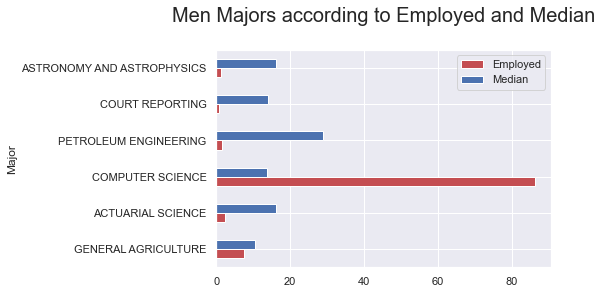

In [89]:
my_colors = 'rb'
normalize_men.set_index("Major").plot.barh(color=my_colors)
plt.title("Men Majors according to Employed and Median",fontsize = 20,y = 1.1)
plt.show()

## **Women Employed Majors**

In [65]:
employ_women_majors = women_majors.sort_values(["Employed"],ascending = False)
employ_women_majors

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
145,146,5200,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.779933,2584,307933,...,115172,174438,28169,0.083811,31500,24000,41000,125148,141860,48207
123,124,3600,BIOLOGY,280709.0,111762.0,168947.0,Biology & Life Science,0.601858,1370,182295,...,72371,100336,13874,0.070725,33400,24000,45000,88232,81109,28339
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.896019,2554,180903,...,40818,122817,8497,0.044863,48000,39000,58000,151643,26146,6193
93,94,1901,COMMUNICATIONS,213996.0,70619.0,143377.0,Communications & Journalism,0.669999,2394,179633,...,49889,116251,14602,0.075177,35000,27000,45000,40763,97964,27440
138,139,2304,ELEMENTARY EDUCATION,170862.0,13029.0,157833.0,Education,0.923745,1629,149339,...,37965,86540,7297,0.046586,32000,23400,38000,108085,36972,11502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,3602,BOTANY,1329.0,626.0,703.0,Biology & Life Science,0.528969,9,1010,...,169,740,0,0.000000,37000,26000,40000,677,184,56
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192
55,56,2303,SCHOOL STUDENT COUNSELING,818.0,119.0,699.0,Education,0.854523,4,730,...,135,545,88,0.107579,41000,41000,43000,509,221,0
120,121,2301,EDUCATIONAL ADMINISTRATION AND SUPERVISION,804.0,280.0,524.0,Education,0.651741,5,703,...,0,504,0,0.000000,34000,29000,35000,346,206,111


In [67]:
employ_women_majors.groupby('Major_category')["Employed"].max()

Major_category
Arts                                    83483
Biology & Life Science                 182295
Communications & Journalism            179633
Education                              149339
Health                                 180903
Humanities & Liberal Arts              149180
Industrial Arts & Consumer Services    103078
Interdisciplinary                        9821
Psychology & Social Work               307933
Social Science                         133454
Name: Employed, dtype: int64

In [68]:
w_category = employ_women_majors.groupby('Major_category')[["Major","Employed","Median"]].first()
w_category

,Major,Employed,Median
Major_category,,,
Arts,COMMERCIAL ART AND GRAPHIC DESIGN,83483,35000
Biology & Life Science,BIOLOGY,182295,33400
Communications & Journalism,COMMUNICATIONS,179633,35000
Education,ELEMENTARY EDUCATION,149339,32000
Health,NURSING,180903,48000
Humanities & Liberal Arts,ENGLISH LANGUAGE AND LITERATURE,149180,32000
Industrial Arts & Consumer Services,PHYSICAL FITNESS PARKS RECREATION AND LEISURE,103078,32000
Interdisciplinary,MULTI/INTERDISCIPLINARY STUDIES,9821,35000
Psychology & Social Work,PSYCHOLOGY,307933,31500


## **Women Median Majors**

In [69]:
salary_women_majors = women_majors.sort_values(['Median'],ascending = False)
salary_women_majors

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
26,27,5601,CONSTRUCTION SERVICES,18498.0,16820.0,1678.0,Industrial Arts & Consumer Services,0.090713,295,16318,...,1751,12313,1042,0.060023,50000,36000,60000,3275,5351,703
32,33,6099,MISCELLANEOUS FINE ARTS,3340.0,1970.0,1370.0,Arts,0.410180,30,2914,...,1067,1200,286,0.089375,50000,25000,66000,693,1714,755
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.896019,2554,180903,...,40818,122817,8497,0.044863,48000,39000,58000,151643,26146,6193
36,37,5501,ECONOMICS,139247.0,89749.0,49498.0,Social Science,0.355469,1322,104117,...,25325,70740,11452,0.099092,47000,35000,65000,25582,37057,10653
44,45,6105,MEDICAL TECHNOLOGIES TECHNICIANS,15914.0,3916.0,11998.0,Health,0.753927,190,13150,...,2665,9005,505,0.036983,45000,36000,50000,5546,7176,1002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


In [70]:
salary_women_majors.groupby("Major_category")["Median"].max()

Major_category
Arts                                   50000
Biology & Life Science                 45000
Communications & Journalism            35000
Education                              41000
Health                                 48000
Humanities & Liberal Arts              40000
Industrial Arts & Consumer Services    50000
Interdisciplinary                      35000
Psychology & Social Work               40000
Social Science                         47000
Name: Median, dtype: int64

In [72]:
w_sal_cat = salary_women_majors.groupby('Major_category')[["Major","Employed","Median"]].first()
w_sal_cat

,Major,Employed,Median
Major_category,,,
Arts,MISCELLANEOUS FINE ARTS,2914,50000
Biology & Life Science,PHARMACOLOGY,1144,45000
Communications & Journalism,ADVERTISING AND PUBLIC RELATIONS,45326,35000
Education,SCHOOL STUDENT COUNSELING,730,41000
Health,NURSING,180903,48000
Humanities & Liberal Arts,UNITED STATES HISTORY,2787,40000
Industrial Arts & Consumer Services,CONSTRUCTION SERVICES,16318,50000
Interdisciplinary,MULTI/INTERDISCIPLINARY STUDIES,9821,35000
Psychology & Social Work,INDUSTRIAL AND ORGANIZATIONAL PSYCHOLOGY,2343,40000


In [74]:
cols2 = ["Employed","Median"]
normalize_women = w_sal_cat
for c in cols2:
    normalize_women[c] = normalize_women[c] * 100 / normalize_women[c].sum()
    

In [75]:
normalize_women

,Major,Employed,Median
Major_category,,,
Arts,MISCELLANEOUS FINE ARTS,0.795299,11.600928
Biology & Life Science,PHARMACOLOGY,0.312225,10.440835
Communications & Journalism,ADVERTISING AND PUBLIC RELATIONS,12.370532,8.120650
Education,SCHOOL STUDENT COUNSELING,0.199234,9.512761
Health,NURSING,49.372685,11.136891
Humanities & Liberal Arts,UNITED STATES HISTORY,0.760638,9.280742
Industrial Arts & Consumer Services,CONSTRUCTION SERVICES,4.453566,11.600928
Interdisciplinary,MULTI/INTERDISCIPLINARY STUDIES,2.680382,8.120650
Psychology & Social Work,INDUSTRIAL AND ORGANIZATIONAL PSYCHOLOGY,0.639460,9.280742


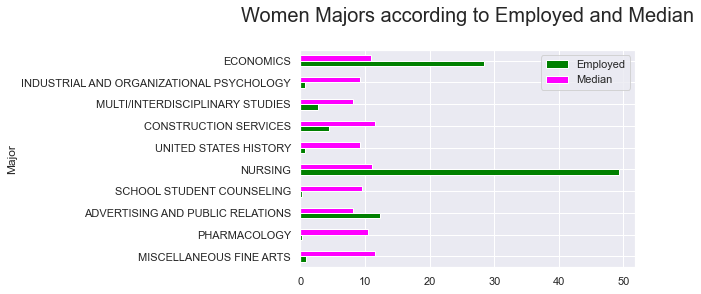

In [88]:
c = ["green","magenta"]
normalize_women.set_index("Major").plot.barh(color = c)
plt.title("Women Majors according to Employed and Median",fontsize = 20,y = 1.1)
plt.show()